In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn as skl

from sklearn.cross_validation import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn import linear_model
from sklearn.feature_selection import RFE

logistic_regression = linear_model.LogisticRegression()

### Load data files 

In [21]:
waves = pd.read_csv('../multiclass/Wavelength.csv', header=None)
x = pd.read_csv('../multiclass/X.csv', header=None)
y = pd.read_csv('../multiclass/y.csv', header=None)

### Setting key colour values

In [22]:
def decode_colours(toDecode):
    keys = {0: 'Blue', 1: 'Green', 2: 'Pink', 3: 'Red', 4: 'Yellow'}

    res = []
    for i in toDecode:
        res.append(keys[i])
        
    return res

### Set up plot parameters 

In [23]:
def plot_parameters(x, y):
    fig_size = plt.rcParams["figure.figsize"]
    fig_size[0] = x
    fig_size[1] = y
    plt.rcParams["figure.figsize"] = fig_size

plot_parameters(30, 10)

In [24]:
x.describe()

,0,1,2,3,4,5,6,7,8,9,...,911,912,913,914,915,916,917,918,919,920
count,450.000000,450.000000,450.000000,450.000000,450.000000,450.000000,450.000000,450.000000,450.000000,450.000000,...,450.000000,450.000000,450.000000,450.000000,450.000000,450.000000,450.000000,450.000000,450.000000,450.000000
mean,0.831778,36.078489,-29.759578,36.237622,24.554111,-19.815911,5.518956,24.440200,6.366400,27.666489,...,27.150978,9.799378,18.105222,3.752111,20.738556,-0.286733,14.574533,10.990689,16.554711,35.873378
std,28.661154,38.447405,40.636535,17.290104,20.467866,25.229021,29.500466,26.104627,26.060944,24.427463,...,30.344943,34.860937,38.391676,42.098634,43.066364,52.972575,39.282065,37.350340,28.352641,25.125371
min,-74.140000,-92.590000,-143.410000,-13.050000,-32.810000,-87.240000,-72.790000,-64.190000,-79.430000,-44.400000,...,-32.680000,-57.770000,-57.650000,-76.860000,-64.200000,-103.700000,-60.730000,-73.420000,-38.540000,-15.760000
25%,-18.747500,9.965000,-56.740000,25.737500,10.487500,-36.810000,-14.835000,7.092500,-11.870000,10.972500,...,-3.982500,-25.557500,-20.912500,-42.067500,-25.817500,-55.842500,-24.437500,-26.797500,-11.785000,9.552500
50%,0.620000,37.705000,-29.555000,35.720000,24.200000,-20.545000,5.030000,25.905000,5.090000,27.085000,...,36.540000,22.170000,31.490000,20.280000,34.925000,15.695000,28.485000,22.535000,25.825000,43.090000
75%,19.420000,60.480000,-2.220000,47.747500,38.565000,-4.895000,27.130000,43.212500,23.150000,43.130000,...,53.275000,39.067500,51.440000,38.925000,56.170000,43.917500,48.262500,42.695000,40.265000,57.110000
max,75.490000,157.780000,99.110000,97.300000,81.810000,49.170000,85.030000,111.630000,109.890000,119.380000,...,80.650000,71.670000,81.130000,75.300000,101.200000,113.160000,86.910000,78.080000,74.620000,89.020000


In [25]:
print(waves.size, x.size, y.size)

921 414450 450


### Drop records with NaN values if any exists

In [ ]:
# Drop all rows that have NaN values
def drop_nan(waves, x, y):
    waves.dropna()
    x.dropna()
    y.dropna()
    
drop_nan(waves, x, y)

### Split data into training and testing sets 

In [26]:
flat_waves = waves.T.as_matrix(columns=None).flatten()
x_train, x_test, y_train, y_test  = train_test_split(x, y, test_size=0.3, random_state=42)

print(x_train.size, y_train.size)
print(x_test.size, y_test.size)

290115 315
124335 135


### Plot features 

In [37]:
def plot_training_data(x_train, y_train, waves):
    index = 0
    y_train = y_train.as_matrix(columns=None)
    
    for ind, row in x_train.iterrows():
        if y_train[index] == 0:
            plt.plot(waves, row, color="blue")
        elif y_train[index] == 1:
            plt.plot(waves, row, color="lightgreen")
        elif y_train[index] == 2:
            plt.plot(waves, row, color="hotpink")
        elif y_train[index] == 3:
            plt.plot(waves, row, color="indianred")
        elif y_train[index] == 4:
            plt.plot(waves, row, color="yellow")    
        index += 1

    plt.xlabel("Wave length")
    plt.ylabel("Optical reflectance intensity")
    plt.yticks([-150, -100, -50, 0, 50, 100, 150])  

    plt.axvspan(576, 577, color='grey', alpha=0.5)
    # plt.axvspan(513, 514, color='grey', alpha=0.5)

    plt.show()

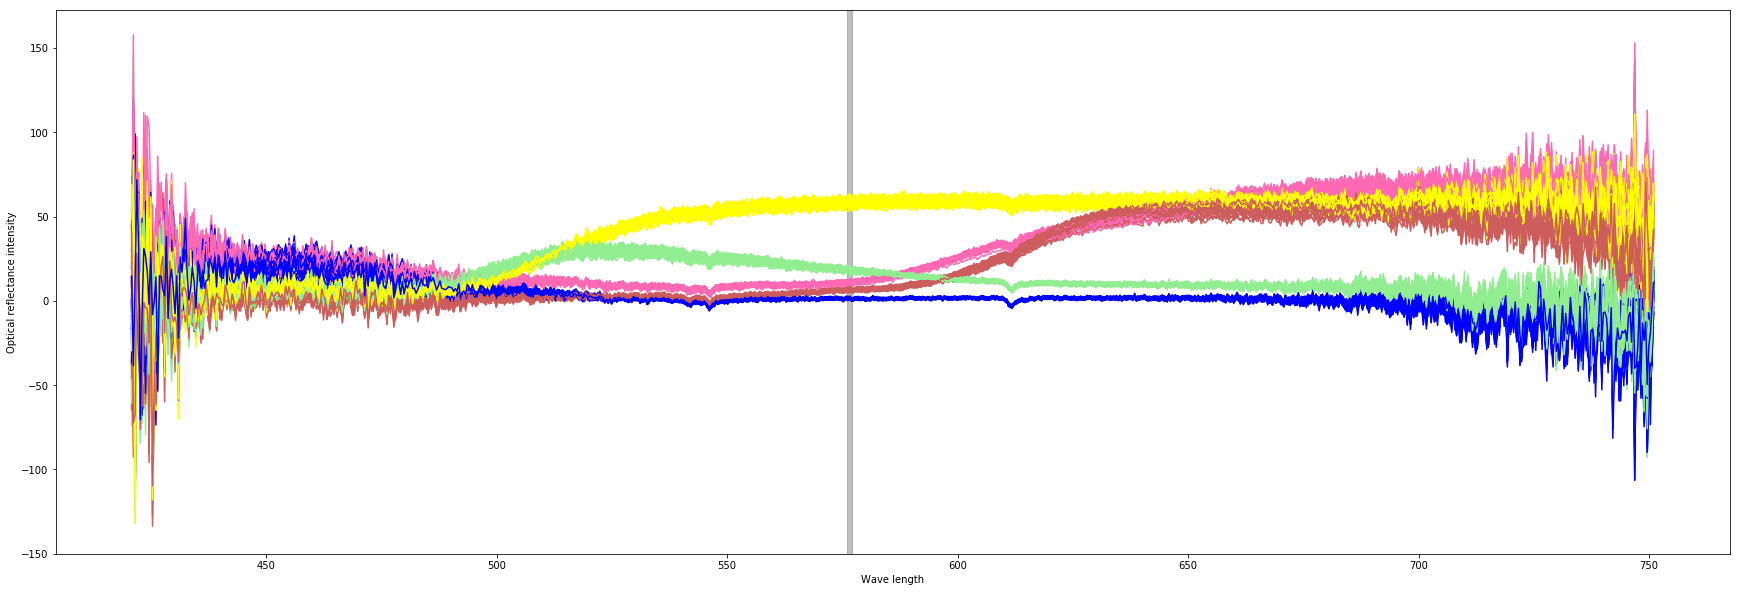

In [38]:
plot_training_data(x_train, y_train, flat_waves)

In [40]:
# plt.hist(x_train[576])

In [30]:
def one_feature_experiment(x_train, y_train):
    accuracies = []
    
    for i in x_train:
        logistic_regression.fit(x_train[i].values.reshape(-1, 1), y_train)
        y_res = logistic_regression.predict(x_train[i].values.reshape(-1, 1))
        accuracies.append(accuracy_score(y_train, y_res))

    return accuracies
        
acc = one_feature_experiment(x_train, y_train)

/usr/local/Cellar/python3/3.6.4_2/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


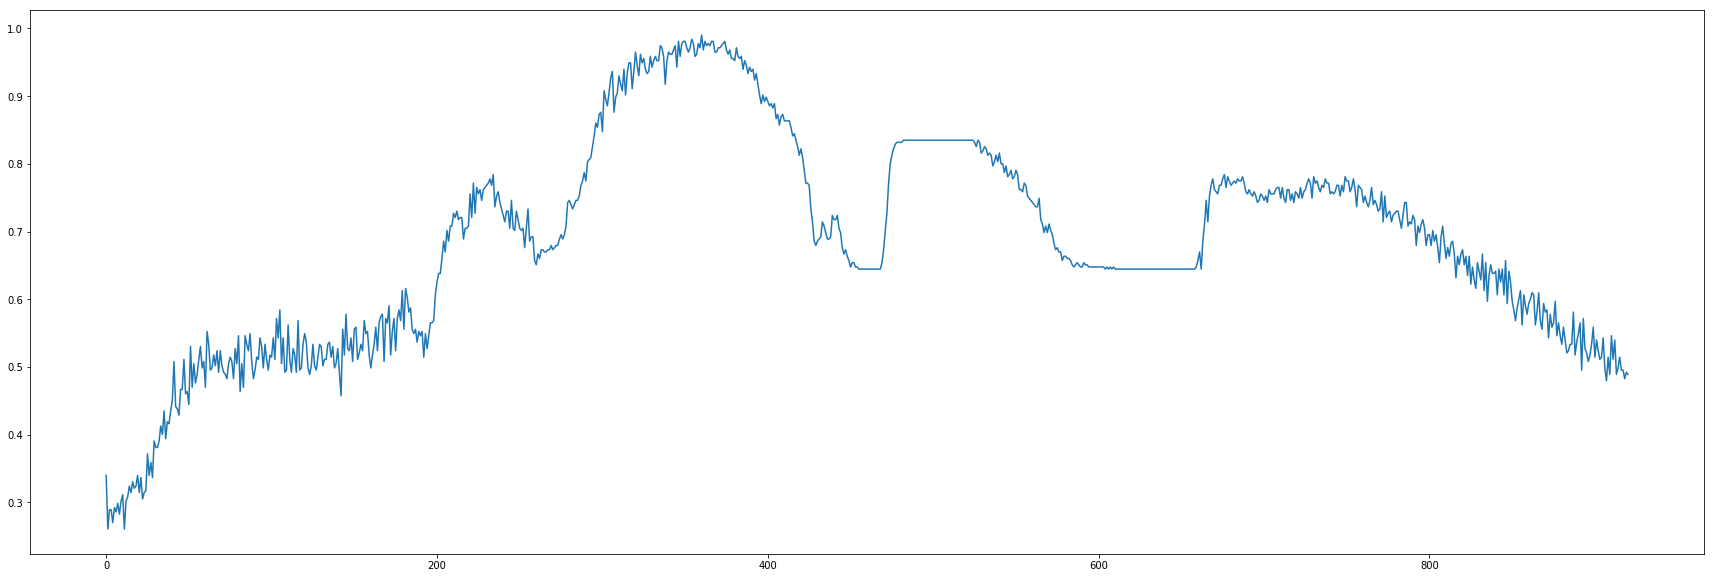

In [34]:
plot_parameters(30, 10)
plt.plot(acc)

In [11]:
def get_true_indices(matrix):
    indices = []
    index = 0
    for i in matrix:
        if i == True:
            indices.append(index)
        index += 1
    return indices

In [35]:
def experiment(no_features):
    results = []
    
    for i in no_features:
        logistic = RFE(logistic_regression, i, step=1)
        logistic = logistic.fit(x_train, y_train)
        
        print(get_true_indices(logistic.support_))
        
        y_res = logistic.predict(x_train)
        accuracy = accuracy_score(y_train, y_res.ravel())
        
        print(accuracy)
        
        results.append(accuracy)
        
    return results

In [36]:
scores = experiment([1, 2, 3, 4, 5, 6, 7, 8, 9, 10])
print(scores)

/usr/local/Cellar/python3/3.6.4_2/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[421]
0.8095238095238095


/usr/local/Cellar/python3/3.6.4_2/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[421, 429]
0.8507936507936508


/usr/local/Cellar/python3/3.6.4_2/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[250, 421, 429]
0.9968253968253968


/usr/local/Cellar/python3/3.6.4_2/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[250, 251, 421, 429]
0.9968253968253968


/usr/local/Cellar/python3/3.6.4_2/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[86, 250, 251, 421, 429]
1.0


/usr/local/Cellar/python3/3.6.4_2/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[86, 250, 251, 421, 429, 586]
1.0


/usr/local/Cellar/python3/3.6.4_2/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[86, 88, 250, 251, 421, 429, 586]
1.0


/usr/local/Cellar/python3/3.6.4_2/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[66, 86, 88, 250, 251, 421, 429, 586]
1.0


/usr/local/Cellar/python3/3.6.4_2/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[66, 86, 88, 250, 251, 421, 429, 584, 586]
1.0


/usr/local/Cellar/python3/3.6.4_2/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[66, 86, 88, 250, 251, 421, 429, 584, 586, 914]
1.0
[0.8095238095238095, 0.8507936507936508, 0.9968253968253968, 0.9968253968253968, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]


In [ ]:
plot_parameters(10, 10)
plt.plot([1, 2, 3, 4, 5, 6, 7, 8, 9, 10], scores, color="royalblue")

In [13]:
def get_wave_values(waves, indices):
    values = []
    
    for i in indices:
        values.append(waves.iloc[[i]])
            
    return values

In [14]:
res = get_wave_values(waves, [66, 86, 88, 250, 251, 421, 429, 584, 586, 914])
res

[          0
 66  445.641,           0
 86  453.123,           0
 88  453.871,            0
 250  513.929,            0
 251  514.297,            0
 421  576.238,            0
 429  579.124,            0
 584  634.521,            0
 586  635.229,            0
 914  748.911]

In [ ]:
# def get_features(df, indices):
#     features = pd.DataFrame()

#     for i in indices:
#         a = df.iloc[:,i]
#         features[i] = a.as_matrix(columns=None)
        
#     return features

# b = x_train.iloc[:,indices[0]]
# features = get_features(x_train, indices)
# print(features)
# print(waves.iloc[[250]], waves.iloc[[421]], waves.iloc[[429]])

### Run linear logistic regression model

In [17]:
logistic_regression.fit(x_train, y_train)
y_res = logistic_regression.predict(x_train)
accuracy_score(y_train, y_res)

/usr/local/Cellar/python3/3.6.4_2/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


1.0

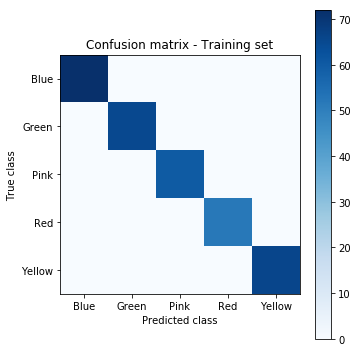

In [18]:
def plot_confusion_matrix(cm, title='Confusion matrix - Training set', cmap=plt.cm.Blues):
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
#     tick_marks = np.arange(len(iris.target_names))
    plt.xticks([0, 1, 2, 3, 4], decode_colours([0, 1, 2, 3, 4]))
    plt.yticks([0, 1, 2, 3, 4], decode_colours([0, 1, 2, 3, 4]))
    plt.tight_layout()
    plt.ylabel('True class')
    plt.xlabel('Predicted class')

plot_parameters(5, 5)
# Compute confusion matrix
cm = confusion_matrix(y_train, y_res)
np.set_printoptions(precision=1)
# print('Confusion matrix, without normalization')
# print(cm)
# plt.figure()
plot_confusion_matrix(cm)

In [ ]:
def write_to_file(df, path):
    df.to_csv(path, encoding='utf-8', index=False)

# write_to_file(y, "PredictedClasses.csv")